In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tabulate

# Ingresamos el dataset y damos una vista previa.

In [7]:
df = pd.read_csv('lol.csv')
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

# Hacemos un análisis mas detallado en busqueda de outliers

In [8]:
df.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  ...  redTowersDestroyed  redTotalGold  \
count        9879.000000  9879.000000  ...         9879.000000   9879.000000   
mean            0.549954     0.361980  ...            0.043021  16489.041401   
std             0.625527     0.480597  ...            0.216900   1490.888406   
min             0.000000     0.000000  ...            0.000000  11212.000000   
25%             0.000000     0.000000  ...            0.000000  15427.500000   
50%             0.000000     0.000000  ...            0.000000  16378.000000   
75%             1.000000     1.000000  ...            0.000000  17418.500000   
max             2.000000     1.000000  ...            2.000000  22732.000000   

       redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
count  9879.000000         9879.000000            9879.000000   
mean      6.925316        17961.730438             217.349226   
std       0.305311         1198.583912              21.911668   
min       4.800000        10465.000000             107.000000   
25%       6.800000        17209.500000             203.000000   
50%       7.000000        17974.000000             218.000000   
75%       7.200000        18764.500000             233.000000   
max       8.200000        22269.000000             289.000000   

       redTotalJungleMinionsKilled   redGoldDiff  redExperienceDiff  \
count                  9879.000000   9879.000000        9879.000000   
mean                     51.313088    -14.414111          33.620306   
std                      10.027885   2453.349179        1920.370438   
min                       4.000000 -11467.000000       -8348.000000   
25%                      44.000000  -1596.000000       -1212.000000   
50%                      51.000000    -14.000000          28.000000   
75%                      57.000000   1585.500000        1290.500000   
max                      92.000000  10830.000000        9333.000000   

       redCSPerMin  redGoldPerMin  
count  9879.000000    9879.000000  
mean     21.734923    1648.904140  
std       2.191167     149.088841  
min      10.700000    1121.200000  
25%      20.300000    1542.750000  
50%      21.800000    1637.800000  
75%      23.300000    1741.850000  
max      28.900000    2273.200000  

[8 rows x 40 columns]

# Ya que no encontramos outliers de esa manera los buscamos inspeccionando los tipos de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Observamos que todos los datos estan completos y el tipo de dato corresponde con lo esperado

Buscamos tipos de datos únicos en nuestro dataset en busca de outliers:

In [10]:
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

# Vemos que los datos estan limpios y no tenemos incongruencias con los datos por lo que podemos comenzar a trabajar con ellos


# Comenzamos el análisis con LogisticReression

In [44]:
y = df['blueWins'].values
X = df.drop(['blueWins'],axis=1).values
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,shuffle=True)
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
accuracy_score(clf.predict(X_test),y_test) 

0.7267206477732794

# Hacemos un kfold de 10 para nuestro train y test para corroborar que no tengamos overfiting u underfiting de nuestros datos:

In [12]:
Score_train_lr = cross_val_score(clf, X_train, y_train, cv=10)
Score_train_lr.mean()
Score_test_lr = cross_val_score(clf, X_test, y_test, cv=10)
Score_test_lr.mean()
print("lr " , Score_test_lr.mean() , Score_train_lr.mean())


lr  0.7425101214574898 0.7284369187000767


Observamos que nuestro resultado 0.7230769230769231 se asemeja a lo obtenido con train y test 0.7246963562753036 0.7334347302768356 por lo que concluimos que el modelo esta bien

# Continuamos con Naive Bayes

In [42]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
pred_nb = clf_nb.predict(X_test)
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)


0.7206477732793523


# Hacemos un kfold de 10 para nuestro train y test para corroborar que no tengamos overfiting u underfiting de nuestros datos:

In [25]:
Score_train_gauss = cross_val_score(clf_nb, X_train, y_train, cv=10)
Score_train_gauss.mean()
Score_test_gauss = cross_val_score(clf_nb, X_test, y_test, cv=10)
Score_test_gauss.mean()
print("gauss " , Score_test_gauss.mean() , Score_train_gauss.mean())

gauss  0.7315789473684211 0.7242528358317831


Observamos que nuestro resultado 0.719838056680162 asemeja a lo obtenido con train y test 0.7190283400809716 0.7303293576977787 por lo que concluimos que el modelo esta bien

# Continuamos con un arbol de decisión

In [32]:
tree = tree.DecisionTreeClassifier()
grid = {'min_samples_split': [5, 10, 20, 50, 100]},
clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)
pred_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)
Score_train_tree = cross_val_score(clf_tree, X_train, y_train, cv=10)
Score_train_tree.mean()
Score_test_tree = cross_val_score(clf_tree, X_test, y_test, cv=10)
Score_test_tree.mean()
print("tree " , Score_test_tree.mean() , Score_train_tree.mean())

0.7008097165991903
tree  0.6939271255060728 0.6779572892730787


Observamos que nuestro resultado 0.6821862348178138 asemeja a lo obtenido con train y test 0.6902834008097167 0.6798500930079878 por lo que concluimos que el modelo esta bien

# Continuamos con un Random Forest

In [35]:
rf = RandomForestClassifier()
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)
pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)
Score_train_randomforest = cross_val_score(clf_rf, X_train, y_train, cv=5)
Score_train_randomforest.mean()
Score_test_randomforest = cross_val_score(clf_rf, X_test, y_test, cv=5)
Score_test_randomforest.mean()
print("forest " , Score_test_randomforest.mean() , Score_train_randomforest.mean())

0.7295546558704453
forest  0.7356275303643726 0.7280334529774809


Observamos que nuestro resultado 0.7263157894736842 asemeja a lo obtenido con train y test 0.7182186234817813 0.7261447277236751 por lo que concluimos que el modelo esta bien

In [46]:
from tabulate import tabulate
table = [["Regresion logística", 0.7267206477732794, Score_train_lr.mean(), Score_test_lr.mean()],["Naive Bayes", acc_nb,Score_train_gauss.mean(),Score_test_gauss.mean()], ["Arbol de decisión", acc_tree, Score_train_tree.mean(), Score_test_tree.mean()], ["Random Forest",acc_rf, Score_train_randomforest.mean(), Score_test_randomforest.mean()]]
print(tabulate(table, headers = ["Modelo", "Score", "Train", "Test"]))

Modelo                  Score     Train      Test
-------------------  --------  --------  --------
Regresion logística  0.726721  0.728437  0.74251
Naive Bayes          0.720648  0.724253  0.731579
Arbol de decisión    0.70081   0.677957  0.693927
Random Forest        0.729555  0.728033  0.735628


# Una vez que ya comparamos y corroboramos nuestros modelos continuamos buscando la correlación de las variables:

Generamos un mapa de calor para comenzar a ver la relación en las variables

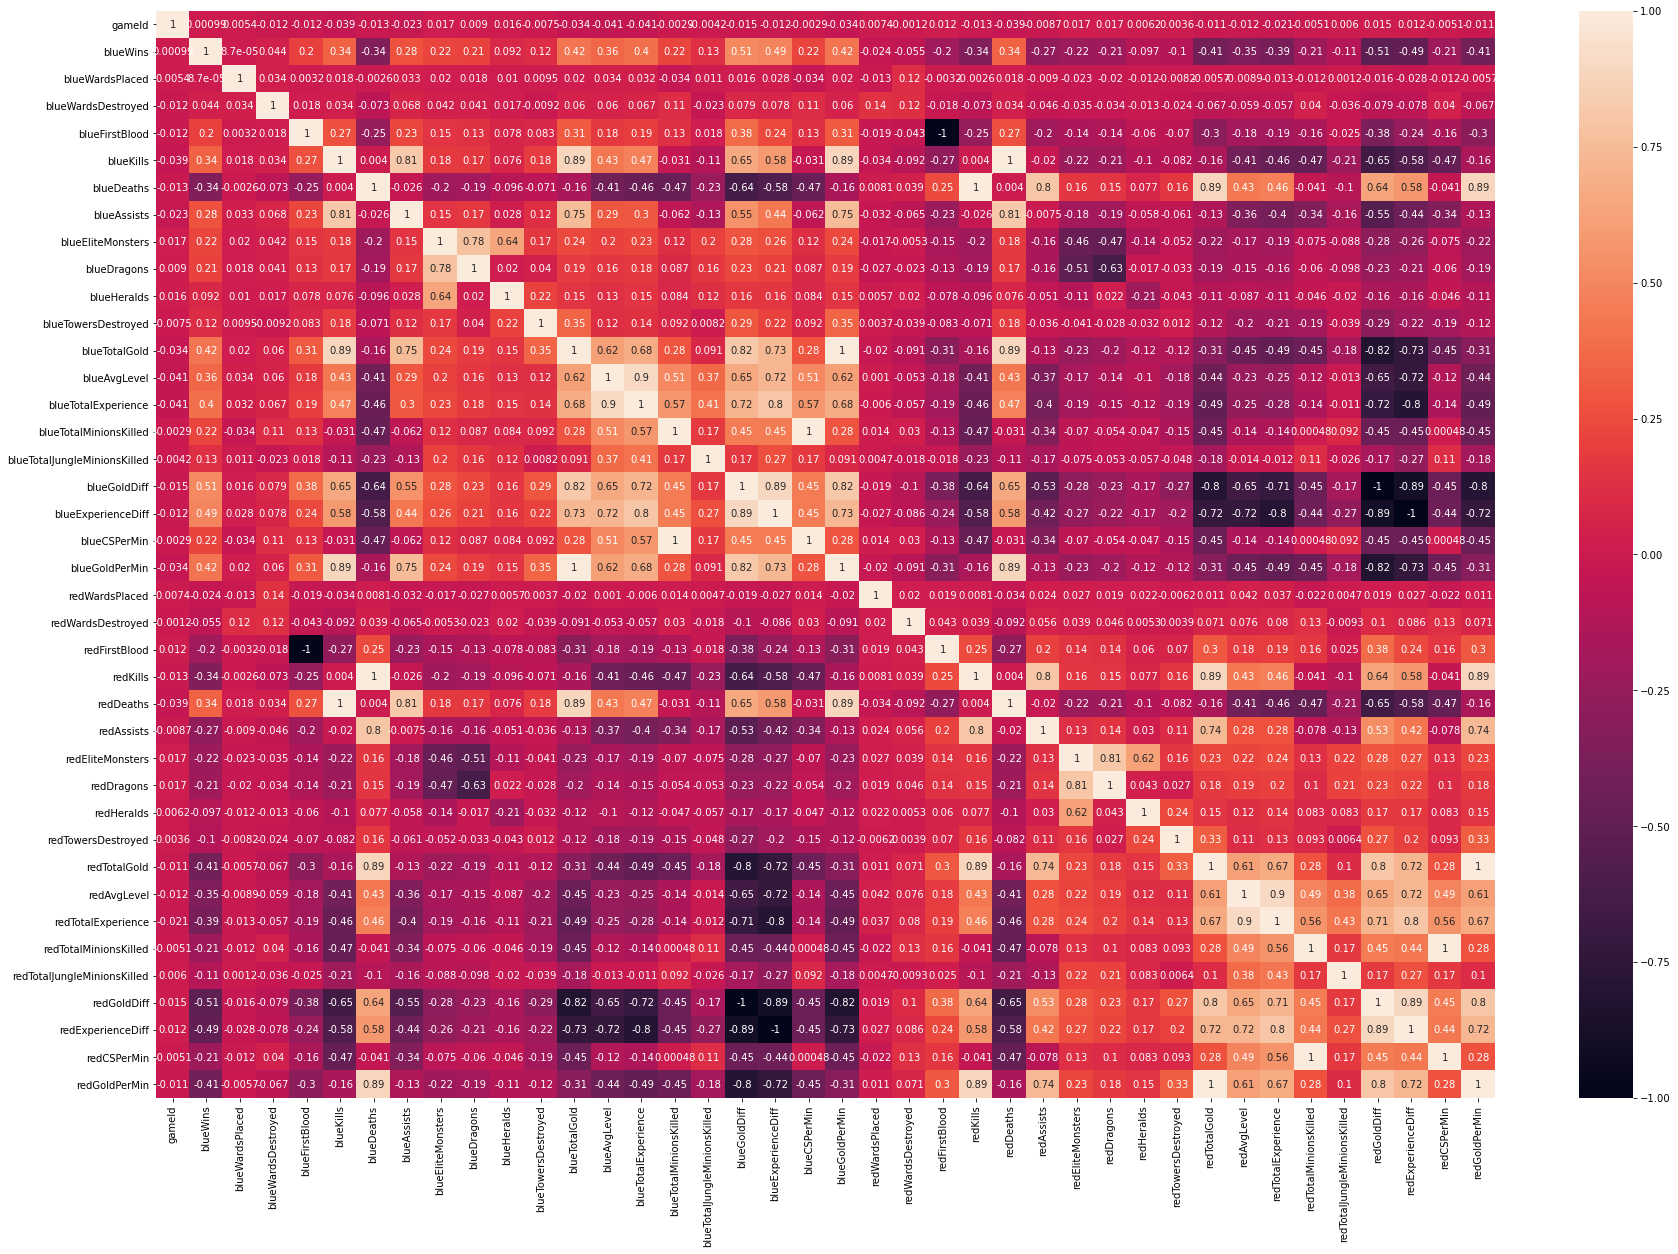

In [12]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot =  True)

Como los datos representan a 2 equipos podemos estudiar solamente una sección del mapa, ya que el cuadrante 1,4 y 2,3 son identicos y lo que afecta al 1 y 4 esta inversamente reflejado en los cuadrantes 2 y 3 por lo que solamente nos fijaremos en el primer cuadrante para hacer esto mas entendible

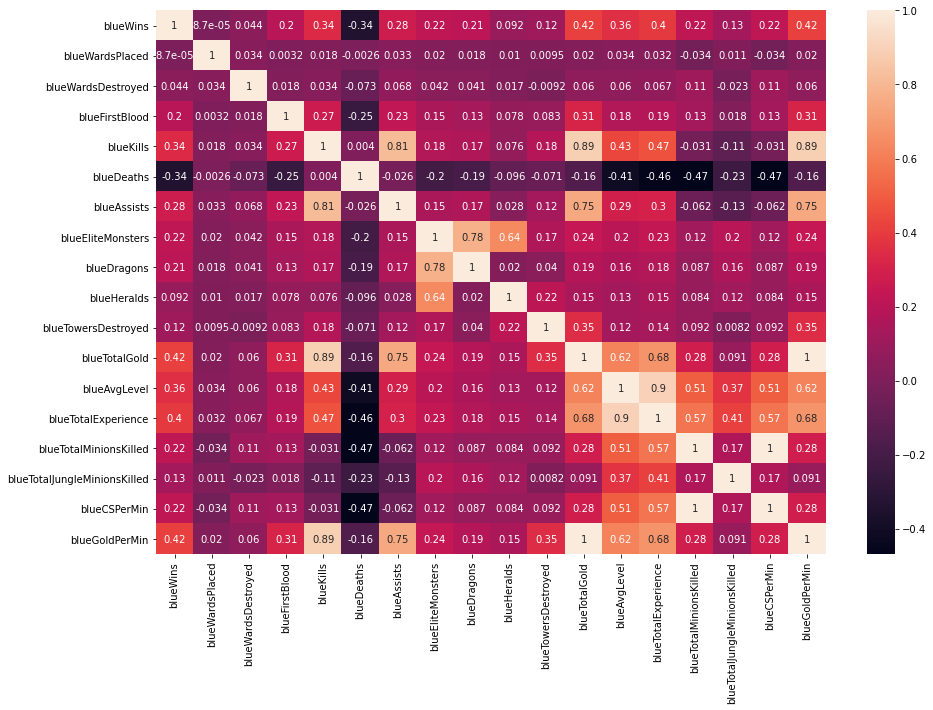

In [13]:
df_1 = df.copy()
df_1 = df_1.drop(['blueGoldDiff', 'blueExperienceDiff','redGoldDiff',
       'redExperienceDiff','gameId','redWardsPlaced','redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'], axis=1)
corr = df_1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot =  True)

#La interpretación de los datos la encontramos mejor explicada en el paper


# Graficamos Oro total contra minions assesinados

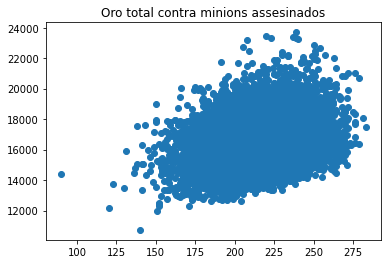

In [14]:
x1 = df['blueTotalMinionsKilled']
y1 = df['blueTotalGold']
plt.title('Oro total contra minions assesinados')
plt.scatter(x1, y1)
plt.show()

Observamos que no hay una relación tan clara entre la cantidad de oro contra la cantidad de minions

# Graficamso Oro total contra asesinatos

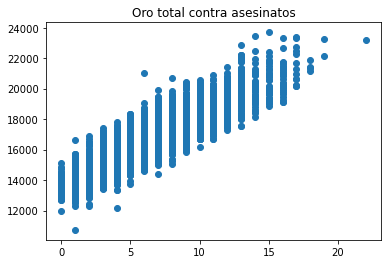

In [15]:
x1 = df['blueKills']
y1 = df['blueTotalGold']
plt.title('Oro total contra asesinatos')
plt.scatter(x1, y1)
plt.show()

Como podemos observar en la gráfica no se puede ver un patron claro que entre mas minions sean assesinados se incrementara el oro de una manera tan linea como se esperaba, hay factores mas importantes que los minions para el incremento en el oro del equipo.

# Graficamos Asesinatos azules con asistencias

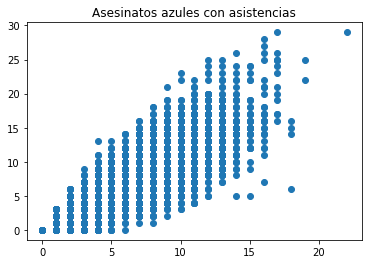

In [16]:
x1 = df['blueKills']
y1 = df['blueAssists']
plt.title('Asesinatos azules con asistencias')
plt.scatter(x1, y1)
plt.show()

Aquí se puede observar una relación mas clara entre las asistencias del equipo y los asesinatos en el equipo.

# Graficamos Partidas ganadas con oro ganado

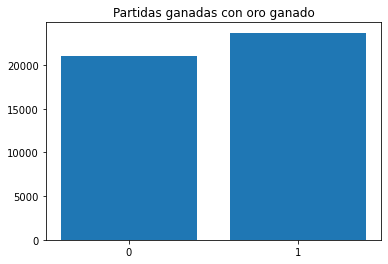

In [17]:
x1 = df['blueWins']
y1 = df['blueTotalGold']
plt.bar(x1, y1)
plt.title('Partidas ganadas con oro ganado')
plt.xticks(range(0,2))
plt.show()

Una gráfica que muestra la relación de partidas ganadas con el oro obtenido, como se puede observar las partidas ganadas tenian una mayor cantidad de oro en el equipo